In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
data = pd.DataFrame(X, columns=housing.feature_names)
data['MedHouseVal'] = y

In [4]:
# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

In [5]:
# Preprocess the data
X = data.drop('MedHouseVal', axis=1)  # Features
y = data['MedHouseVal']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}")

Linear Regression MSE: 0.56


In [7]:
# Train a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}")

Random Forest MSE: 0.26


In [8]:
# Causal inference with linear regression
# Assume 'AveRooms' is the treatment variable and 'AveBedrms' is the potential confounder
treatment = X_train['AveRooms']
confounder = X_train['AveBedrms']

# Fit linear regression models
lr_without_confounder = LinearRegression().fit(treatment.values.reshape(-1, 1), y_train)
lr_with_confounder = LinearRegression().fit(np.column_stack((treatment, confounder)), y_train)

# Calculate the treatment effect
treatment_effect_without_confounder = lr_without_confounder.coef_[0]
treatment_effect_with_confounder = lr_with_confounder.coef_[0]

print("Treatment effect without adjusting for the confounder:", treatment_effect_without_confounder)
print("Treatment effect after adjusting for the confounder:", treatment_effect_with_confounder)

Treatment effect without adjusting for the confounder: 0.07675558963126798
Treatment effect after adjusting for the confounder: 0.3242701459018018


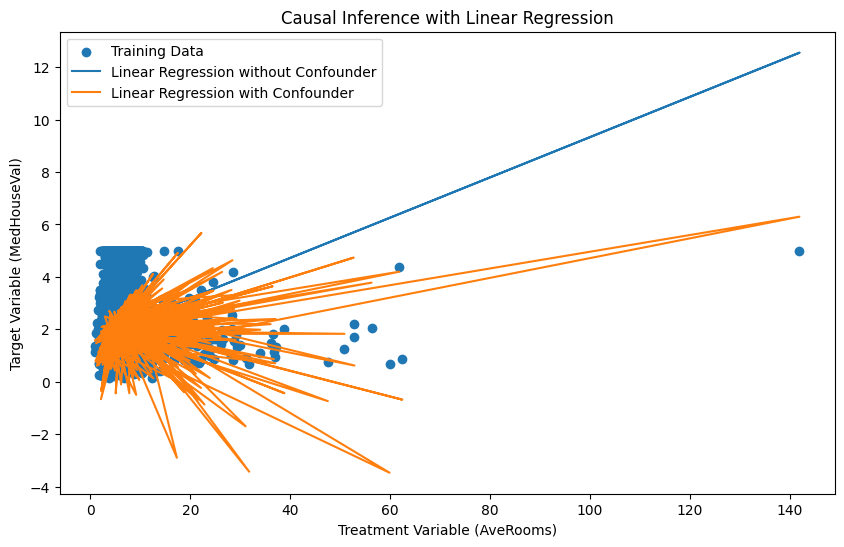

In [9]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train['AveRooms'], y_train, label='Training Data')
plt.plot(X_train['AveRooms'], lr_without_confounder.predict(treatment.values.reshape(-1, 1)), label='Linear Regression without Confounder')
plt.plot(X_train['AveRooms'], lr_with_confounder.predict(np.column_stack((treatment, confounder))), label='Linear Regression with Confounder')
plt.xlabel('Treatment Variable (AveRooms)')
plt.ylabel('Target Variable (MedHouseVal)')
plt.title('Causal Inference with Linear Regression')
plt.legend()
plt.show()

Explanation:
Same as before, we visualize the results of the causal inference analysis using linear regression. We create a scatter plot of the training data, showing the relationship between the treatment variable ('AveRooms') and the target variable ('MedHouseVal'). We then plot the fitted lines for the linear regression models with and without the confounder ('AveBedrms').
In this example, we use the California Housing dataset from scikit-learn. The dataset contains information about housing values in California, including various features like the average number of rooms, bedrooms, and other attributes.
We assume that the 'AveRooms' (average number of rooms per household) is the treatment variable, and 'AveBedrms' (average number of bedrooms per household) is a potential confounder. The causal inference section demonstrates how to estimate the treatment effect of 'AveRooms' on the median house value ('MedHouseVal') with and without adjusting for the confounder 'AveBedrms' using linear regression.
This example illustrates how to use pre-loaded datasets from scikit-learn and apply causal inference techniques in a machine learning context.

In this cell, we perform causal inference using linear regression. We assume that 'AveRooms' (average number of rooms per household) is the treatment variable, and 'AveBedrms' (average number of bedrooms per household) is a potential confounder. We fit two linear regression models: one without the confounder and one with the confounder. We then compare the treatment effect with and without adjusting for the confounder.